<a href="https://colab.research.google.com/github/M-Awwab-Khan/MNIST-Handwritten-Digit-Classification-API/blob/main/MNSIT_handwritten_digit_classifier_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Dependencies

In [ ]:
!pip install tensorflow==2.16.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Loading Dataset

In [2]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

# Exploration

In [3]:
print("X_train: ", X_train.shape)
print("Y_train: ", Y_train.shape)
print("X_test: ", X_test.shape)
print("Y_test: ", Y_test.shape)

X_train:  (60000, 28, 28)
Y_train:  (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
cv2_imshow(X_train[0])

In [5]:
print(Y_train[0])

5


In [6]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


# Normalizing the Data

In [7]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Model Building

In [8]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, validation_split=0.1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8732 - loss: 0.4544 - val_accuracy: 0.9648 - val_loss: 0.1217
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9611 - loss: 0.1325 - val_accuracy: 0.9745 - val_loss: 0.0917
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9737 - loss: 0.0850 - val_accuracy: 0.9753 - val_loss: 0.0833
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9825 - loss: 0.0596 - val_accuracy: 0.9750 - val_loss: 0.0804
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9875 - loss: 0.0436 - val_accuracy: 0.9757 - val_loss: 0.0790
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9915 - loss: 0.0326 - val_accuracy: 0.9752 - val_loss: 0.0818
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9939 - loss: 0.0239 - val_accuracy: 0.9745 - val_loss: 0.0881
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9955 - loss: 0.0182

# Model Evaluation

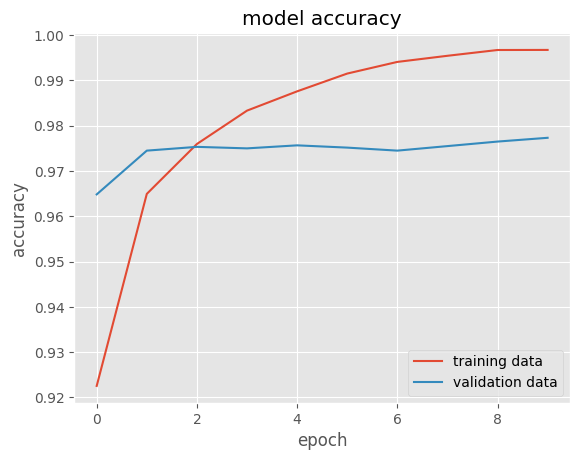

In [9]:
plt.style.use('ggplot')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

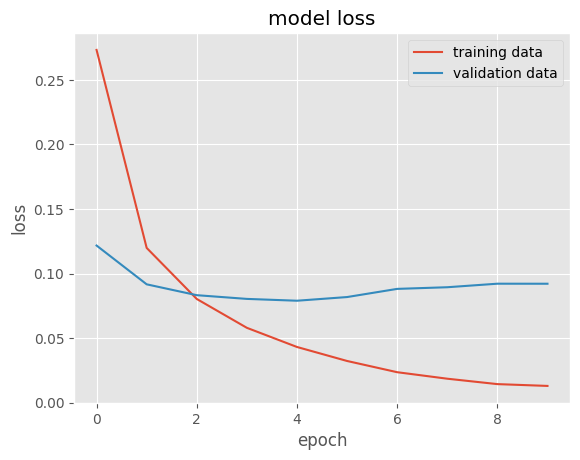

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [11]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9739 - loss: 0.0972
0.9771000146865845


# Parsing Predictions

In [12]:
y_pred = model.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[6.6886612e-09, 1.4670405e-10, 3.1264349e-08, ..., 9.9990183e-01,
        1.2117391e-06, 2.2134782e-06],
       [5.8391844e-13, 7.5847328e-07, 9.9999887e-01, ..., 6.9665513e-20,
        3.4896061e-08, 5.1794373e-18],
       [2.0835587e-10, 9.9995536e-01, 1.5598648e-06, ..., 5.3860645e-06,
        3.7471404e-05, 3.4090597e-10],
       ...,
       [1.8937223e-18, 9.5668856e-16, 2.9460929e-20, ..., 1.1393963e-08,
        2.4328270e-10, 1.6838632e-09],
       [1.0508846e-16, 4.9515829e-17, 2.6719810e-19, ..., 1.2483772e-13,
        7.0869923e-08, 2.8028347e-16],
       [2.4182040e-13, 7.0456545e-16, 4.2530324e-14, ..., 2.0110038e-17,
        1.4457539e-12, 7.6839760e-18]], dtype=float32)

In [ ]:
predicted_labels = [np.argmax(i) for i in y_pred]
predicted_labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


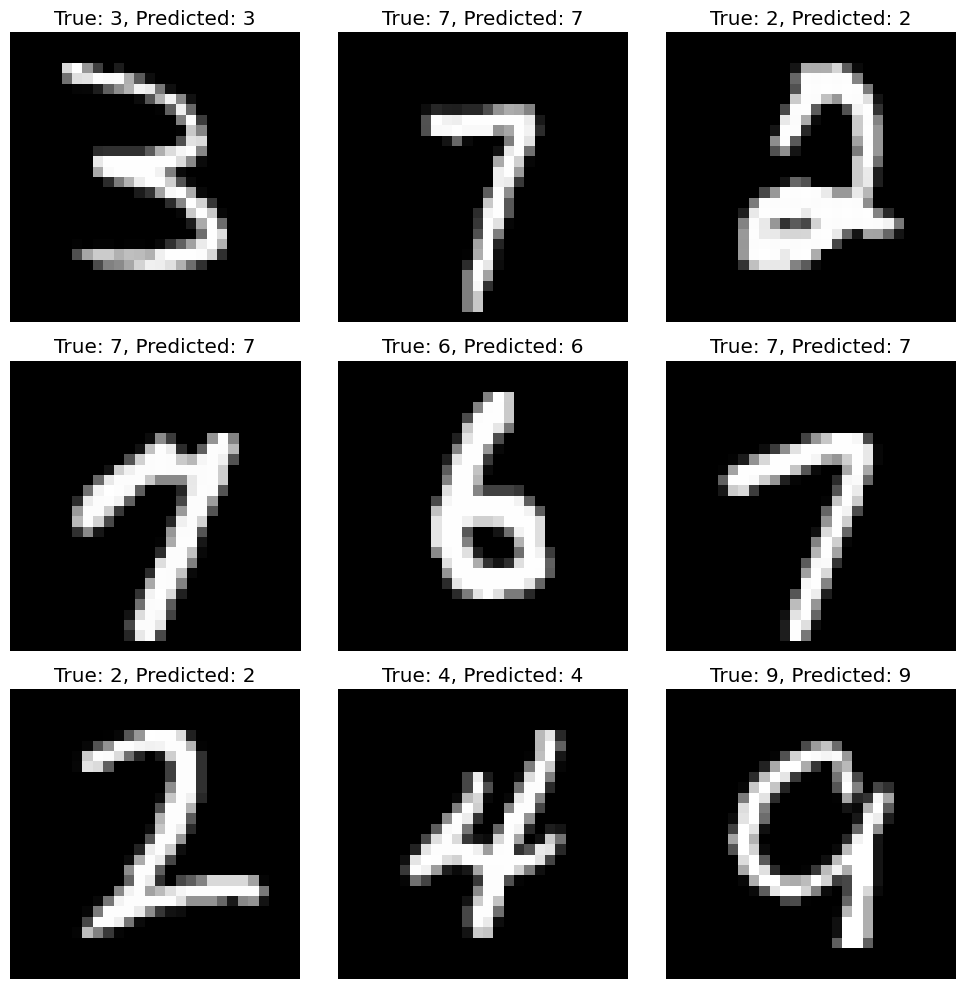

In [14]:
# Define the number of examples to plot
num_examples = 9

# Get predictions for the test examples
predictions = model.predict(X_test)

# Randomly select num_examples indices
indices = np.random.choice(len(X_test), num_examples, replace=False)

# Create a grid of subplots
rows = int(np.sqrt(num_examples))
cols = int(np.ceil(num_examples / rows))
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

# Plot each example along with its true label and predicted label
for i, idx in enumerate(indices):
    ax = axes[i // cols, i % cols]
    ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'True: {Y_test[idx]}, Predicted: {np.argmax(predictions[idx])}')

# Adjust layout
plt.tight_layout()
plt.show()


# Visualize Confusion Matrix

In [16]:
conf_mat = confusion_matrix(Y_test, predicted_labels)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    1,    2,    2,    1,    0,    2,    1,    3,    3],
       [   0, 1126,    3,    0,    0,    1,    1,    0,    4,    0],
       [   2,    5,  987,   13,    0,    1,    2,    9,   12,    1],
       [   1,    0,    0,  995,    1,    3,    0,    4,    2,    4],
       [   1,    2,    1,    1,  955,    0,    6,    4,    2,   10],
       [   2,    1,    0,    9,    4,  866,    5,    0,    4,    1],
       [   3,    3,    0,    1,    6,   13,  930,    0,    2,    0],
       [   2,    4,    6,    1,    0,    0,    0, 1014,    1,    0],
       [   2,    0,    1,    5,    2,    1,    2,    4,  955,    2],
       [   1,    4,    0,    5,    6,    4,    0,    7,    4,  978]],
      dtype=int32)>

Text(0.5, 47.7222222222222, 'Predicted Labels')

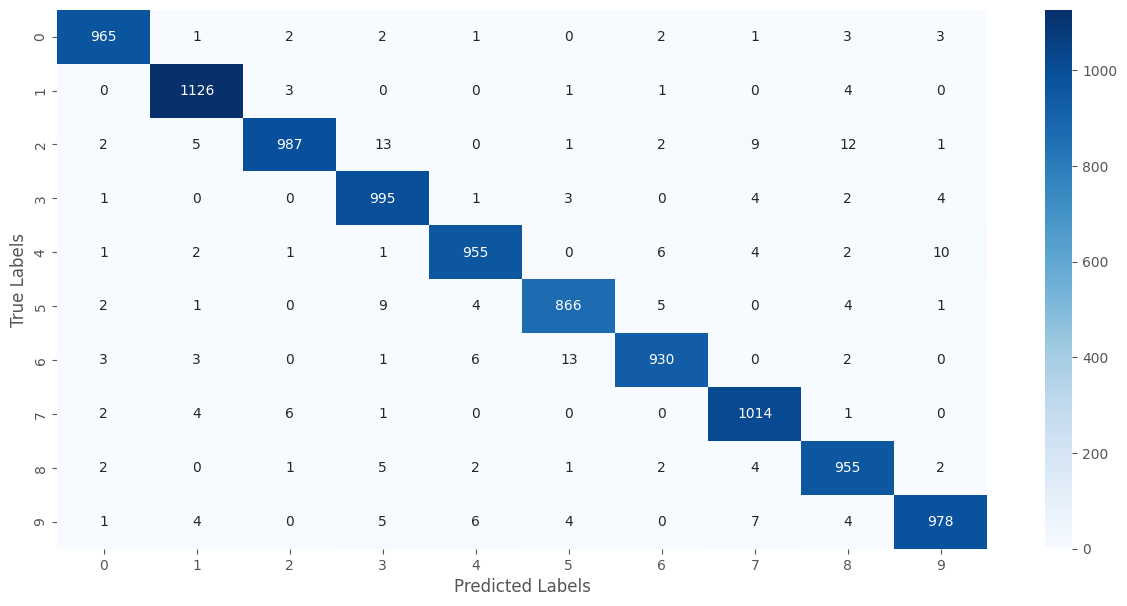

In [17]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

# Predictive Pipeline

Path of the image to be predicted: mnist_digit.png


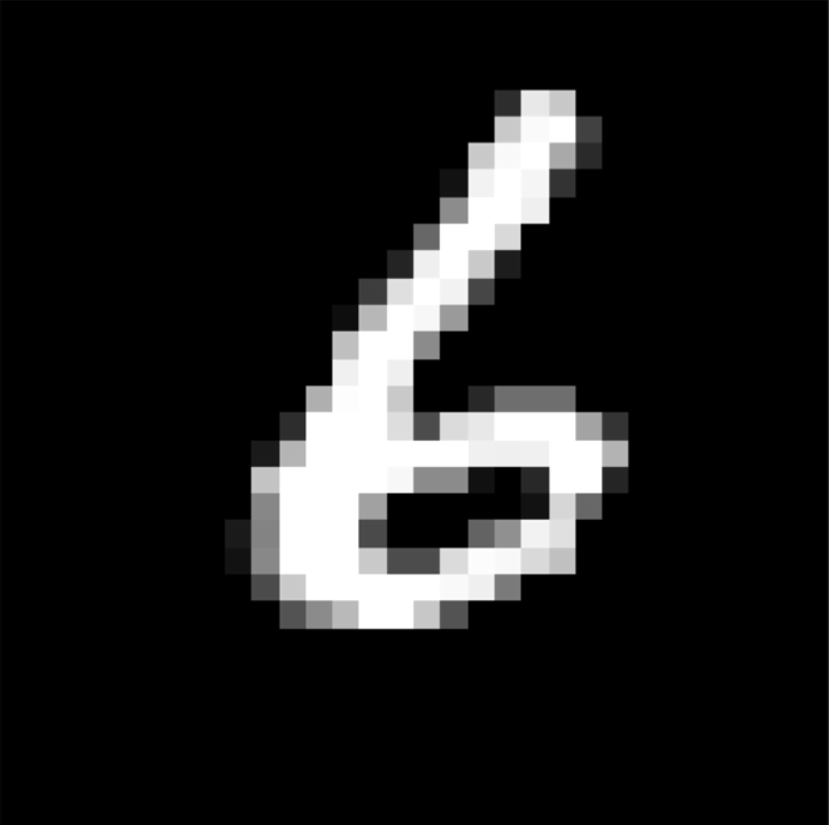

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The Handwritten Digit is recognised as  6


In [22]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print('The Handwritten Digit is recognised as ', input_pred_label)

# Saving the Model

In [23]:
model.save('mnist.keras')